In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from collections import Counter
import math
from math import log
import pprint

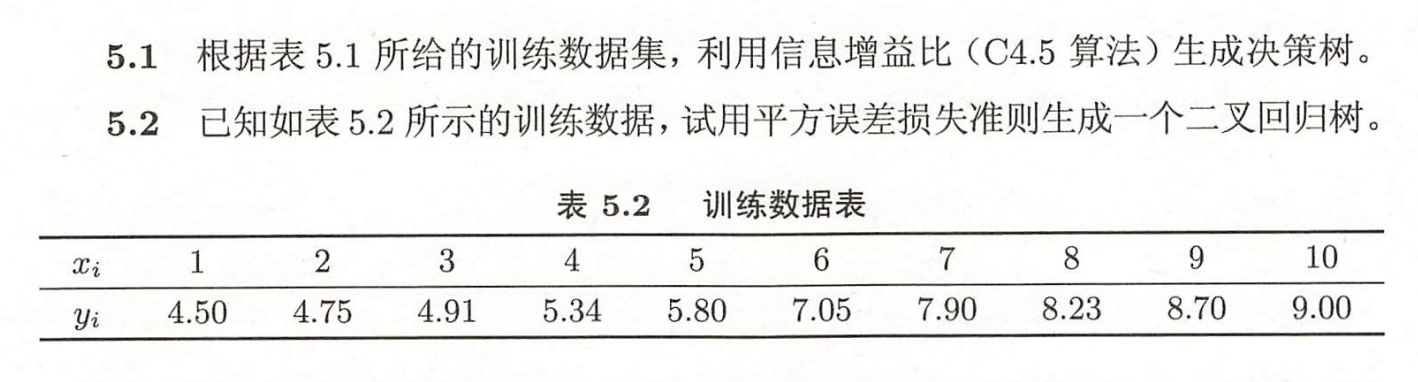

# 5.1

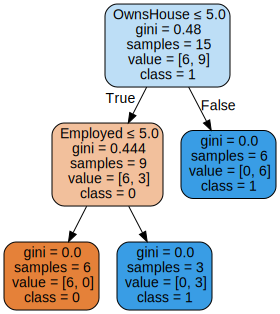

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
import numpy as np
import pandas as pd

from sklearn import tree
import graphviz

new_features = ["Age", "Employed", "OwnsHouse", "CreditSituation"]
new_X_train = pd.DataFrame([
    ["Youth", "No", "No", "Fair"],
    ["Youth", "No", "No", "Good"],
    ["Youth", "Yes", "No", "Good"],
    ["Youth", "Yes", "Yes", "Fair"],
    ["Youth", "No", "No", "Fair"],
    ["MiddleAged", "No", "No", "Fair"],
    ["MiddleAged", "No", "No", "Good"],
    ["MiddleAged", "Yes", "Yes", "Good"],
    ["MiddleAged", "No", "Yes", "Excellent"],
    ["MiddleAged", "No", "Yes", "Excellent"],
    ["Senior", "No", "Yes", "Excellent"],
    ["Senior", "No", "Yes", "Good"],
    ["Senior", "Yes", "No", "Good"],
    ["Senior", "Yes", "No", "Excellent"],
    ["Senior", "No", "No", "Fair"]
])
new_y_train = pd.DataFrame(["No", "No", "Yes", "Yes", "No",
                            "No", "No", "Yes", "Yes", "Yes",
                            "Yes", "Yes", "Yes", "Yes", "No"])

# 数据预处理
le_x = preprocessing.LabelEncoder()
le_x.fit(np.unique(new_X_train))
new_X_train = new_X_train.apply(le_x.transform)
le_y = preprocessing.LabelEncoder()
le_y.fit(np.unique(new_y_train))
new_y_train = new_y_train.apply(le_y.transform)

# 调用sklearn.DT建立训练模型
model_tree = DecisionTreeClassifier()
model_tree.fit(new_X_train, new_y_train)

# 可视化
dot_data = tree.export_graphviz(model_tree, out_file=None,
                                feature_names=new_features,
                                class_names=[str(k) for k in np.unique(new_y_train)],
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph